In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Q3 Part A

In [ ]:
def marr_hildreth_edge_detection(image_path, sigma=2, laplacian_kernel_size=3, threshold=15):
    # Load the grayscale image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Step 1: Apply Gaussian filter to smooth the image
    blurred = cv2.GaussianBlur(image, (0, 0), sigma)
    
    # Step 2: Apply Laplacian to detect edges
    laplacian = cv2.Laplacian(blurred, cv2.CV_64F, ksize=laplacian_kernel_size)
    
    # Step 3: Detect zero-crossings by checking sign changes in the Laplacian output
    # Initialize the zero-crossing edge map
    edges = np.zeros_like(laplacian, dtype=np.uint8)
    
    # Check each pixel (except border pixels) for zero-crossings
    for y in range(1, laplacian.shape[0] - 1):
        for x in range(1, laplacian.shape[1] - 1):
            # Current pixel
            current_pixel = laplacian[y, x]
            # Check neighboring pixels for sign change
            neighbors = [
                laplacian[y-1, x], laplacian[y+1, x],  # Vertical neighbors
                laplacian[y, x-1], laplacian[y, x+1],  # Horizontal neighbors
                laplacian[y-1, x-1], laplacian[y-1, x+1],  # Diagonal neighbors
                laplacian[y+1, x-1], laplacian[y+1, x+1]
            ]
            # Detect zero-crossing if any neighbor has an opposite sign and magnitude is above threshold
            if any((current_pixel * neighbor < 0) and (abs(current_pixel - neighbor) > threshold) for neighbor in neighbors):
                edges[y, x] = 255  # Mark as edge

    # Display the results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.title("Laplacian of Gaussian")
    plt.imshow(laplacian, cmap='gray')
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.title("Detected Edges")
    plt.imshow(edges, cmap='gray')
    plt.axis('off')
    plt.show()

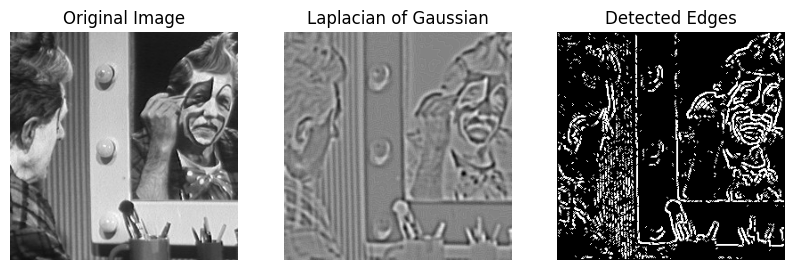

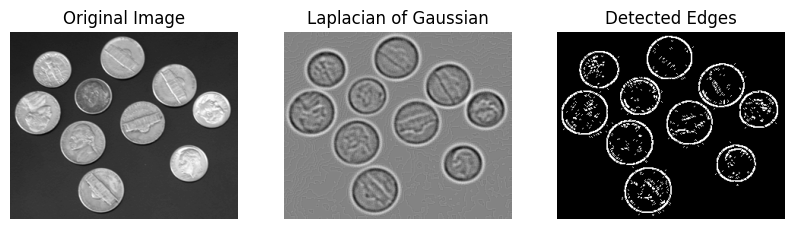

In [ ]:
# Example usage
image_path1 = 'clown.png'  # Replace with your image path
marr_hildreth_edge_detection(image_path1)
image_path2 = 'coins1.png'  # Replace with your image path
marr_hildreth_edge_detection(image_path2)

Q3 Part B

In [ ]:
def DOG(image_path, sigma1=1.6, sigma2=1):
    # Load the grayscale image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Step 1: Apply two Gaussian filters with different standard deviations
    gaussian1 = cv2.GaussianBlur(image, (0, 0), sigma1)
    gaussian2 = cv2.GaussianBlur(image, (0, 0), sigma2)
    
    # Step 2: Subtract the two Gaussian-blurred images to approximate Laplacian of Gaussian
    dog = gaussian1 - gaussian2
    

    # Display the results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.title("DOG")
    plt.imshow(dog, cmap='gray')
    plt.axis('off')
    plt.show()

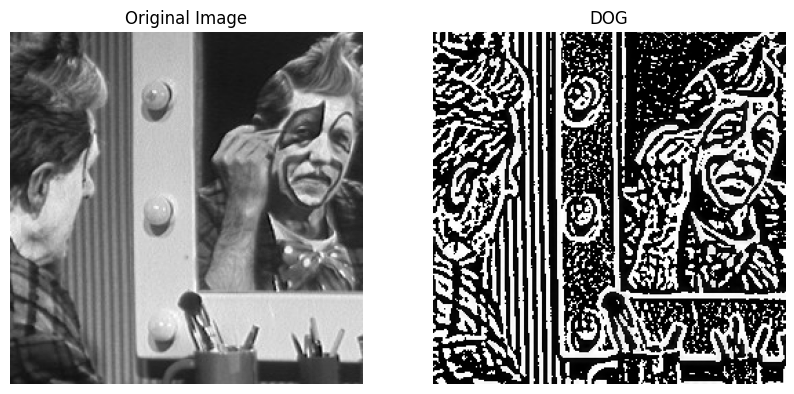

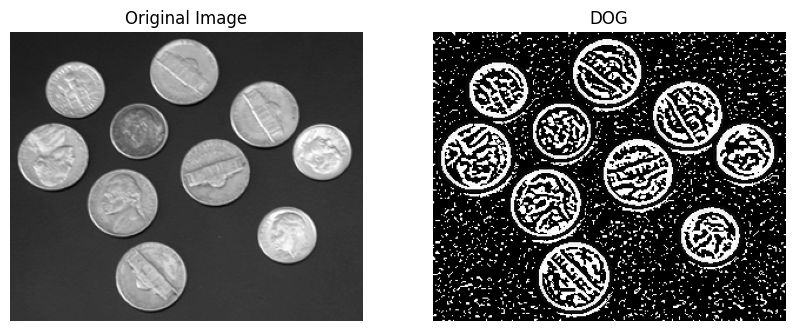

In [7]:
DOG(image_path1)
DOG(image_path2)

Q3 Part C

In [ ]:
def canny_edge_detection(image_path, low_threshold=50, high_threshold=150):
    # Load the grayscale image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Apply the Canny edge detector
    edges = cv2.Canny(image, low_threshold, high_threshold)
    
    # Display the results with axis numbering removed
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.title("Canny Edge Detection")
    plt.axis('off')
    
    plt.show()

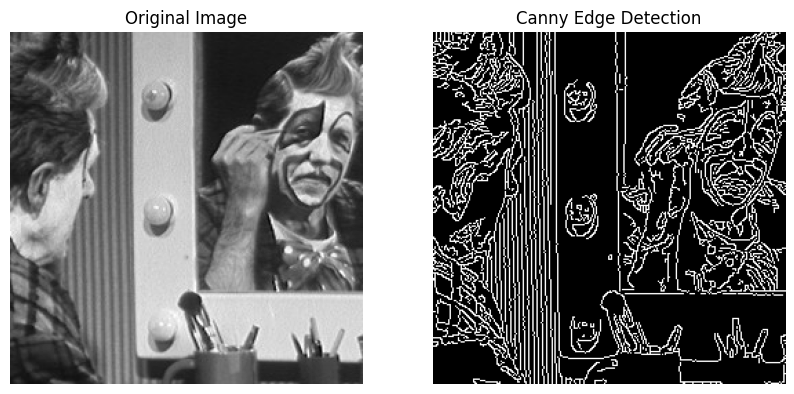

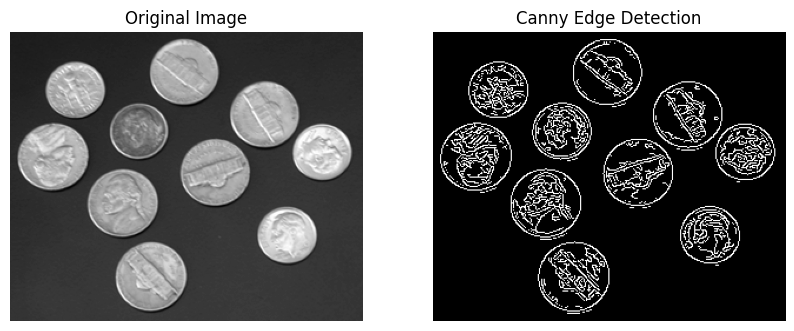

In [9]:
canny_edge_detection(image_path1)
canny_edge_detection(image_path2)

In [ ]:
# def circular_hough_transform(image_path, spacing=10, radius_bins=[(10, 20), (20, 30)], k=5):
#     # Load the grayscale image
#     image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
#     # Apply edge detection (using Canny)
#     edges = cv2.Canny(image, 50, 150)
    
#     # Initialize parameters for HoughCircles
#     min_radius, max_radius = radius_bins[0][0], radius_bins[-1][1]
    
#     # Perform Hough Circle Transform
#     circles = cv2.HoughCircles(
#         edges,                      # Input edge-detected image
#         cv2.HOUGH_GRADIENT,         # Detection method
#         dp=1,                       # Inverse ratio of resolution
#         minDist=spacing,            # Minimum distance between circle centers
#         param1=100,                 # Higher threshold for Canny (edge detection step)
#         param2=30,                  # Threshold for center detection
#         minRadius=min_radius,       # Minimum circle radius
#         maxRadius=max_radius        # Maximum circle radius
#     )

#     # Convert the circle parameters to integer values and select the top k circles
#     if circles is not None:
#         circles = np.uint16(np.around(circles))
#         circles = circles[0, :k]  # Select top k circles

#         # Display the circles on a separate plot
#         plt.figure(figsize=(8, 8))
#         output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # Convert to color for visualization
#         for i, (x, y, r) in enumerate(circles):
#             # Draw the circle in the output image
#             cv2.circle(output_image, (x, y), r, (0, 255, 0), 2)  # Draw circle outline
#             cv2.circle(output_image, (x, y), 2, (0, 0, 255), 3)  # Draw circle center

#         # Display results
#         plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
#         plt.title(f"Top {k} Detected Circles")
#         plt.axis('off')
#         plt.show()
#     else:
#         print("No circles were detected.")

In [ ]:
from collections import defaultdict

def custom_hough_circles(edges, radius_bins, spacing):
    min_radius, max_radius = radius_bins[0][0], radius_bins[-1][1]
    rows, cols = edges.shape
    accumulator = defaultdict(int)

    # Iterate through each edge pixel and cast votes
    for y in range(rows):
        for x in range(cols):
            if edges[y, x] > 0:  # edge pixel
                for r in range(min_radius, max_radius + 1):
                    for theta in range(0, 360, spacing):
                        a = int(x - r * np.cos(np.deg2rad(theta)))
                        b = int(y - r * np.sin(np.deg2rad(theta)))
                        if 0 <= a < cols and 0 <= b < rows:
                            accumulator[(a, b, r)] += 1

    # Collect top circles with most votes
    circles = sorted(accumulator.items(), key=lambda x: x[1], reverse=True)
    return [(a, b, r) for (a, b, r), _ in circles]

def circular_hough_transform(image_path, spacing=10, radius_bins=[(10, 20), (20, 30)], k=9):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    edges = cv2.Canny(image, 50, 150)

    # Detect circles using the custom Hough Transform
    circles = custom_hough_circles(edges, radius_bins, spacing)

    # Select top k circles
    if circles:
        circles = circles[:k]
        plt.figure(figsize=(8, 8))
        output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
        for i, (x, y, r) in enumerate(circles):
            cv2.circle(output_image, (x, y), r, (0, 255, 0), 2)
            cv2.circle(output_image, (x, y), 2, (0, 0, 255), 3)

        plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
        plt.title(f"Top {k-1} Detected Circles")
        plt.axis('off')
        plt.show()
    else:
        print("No circles were detected.")


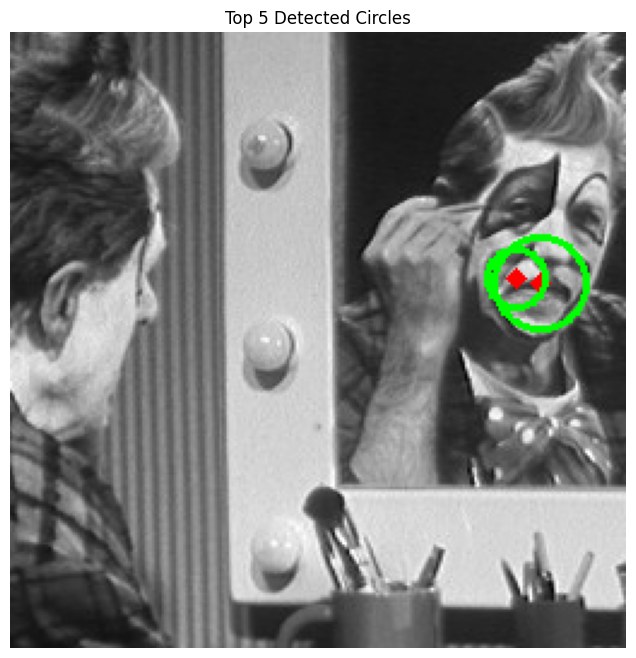

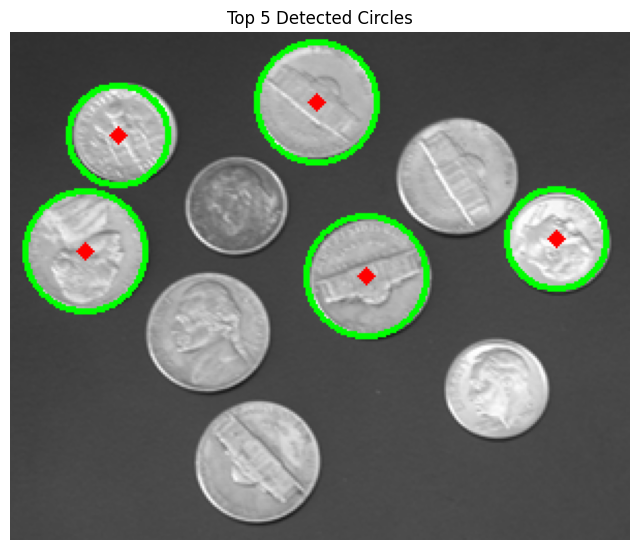

In [31]:
circular_hough_transform(image_path1)
circular_hough_transform(image_path2)

Q4

Q4 Part A

In [12]:
def compute_histogram(image):
    # Compute the histogram of the grayscale image
    histogram, _ = np.histogram(image, bins=256, range=(0, 256))
    return histogram

def otsu_thresholding(histogram):
    total_pixels = np.sum(histogram)
    sum_all = np.dot(np.arange(256), histogram)
    global_mean = sum_all / total_pixels
    
    max_between_class_variance = 0
    min_within_class_variance = float('inf')
    threshold = 0
    max_ratio = 0.0
    
    sum_b, weight_b = 0, 0
    
    for t in range(256):
        weight_b += histogram[t] #Number of pixels before t;
        if weight_b == 0:
            continue
        weight_f = total_pixels - weight_b #Number of pixels after t;
        if weight_f == 0:
            break
        
        sum_b += t * histogram[t] #Total sum of pixels before tl
        mean_b = sum_b / weight_b  #mean of pixels before t
        mean_f = (sum_all - sum_b) / weight_f

        # Class probabilities
        P1 = weight_b / total_pixels
        P2 = weight_f / total_pixels
        
        # Within-class variances
        var_b = np.dot((np.arange(t+1) - mean_b)**2, histogram[:t+1]) / weight_b
        var_f = np.dot((np.arange(t+1, 256) - mean_f)**2, histogram[t+1:]) / weight_f
        within_class_variance = P1 * var_b + P2 * var_f

        # Between-class variance
        between_class_variance = P1 * ((mean_b - global_mean) ** 2) + P2 * ((mean_f - global_mean) ** 2)

        ratio = (between_class_variance)/(between_class_variance + within_class_variance)
        if ratio > max_ratio:
            max_ratio = ratio
            max_between_class_variance = between_class_variance
            min_within_class_variance = within_class_variance
            threshold = t
            

    return threshold, max_between_class_variance, min_within_class_variance


def kmeans_thresholding(histogram, max_iters=100):
    # Initial cluster means (centers)
    mean1, mean2 = 50, 200
    threshold = 0

    for _ in range(max_iters):
        # Classify pixels into two clusters based on the distance to means
        cluster1 = [i for i in range(256) if abs(i - mean1) < abs(i - mean2)]
        cluster2 = [i for i in range(256) if abs(i - mean2) <= abs(i - mean1)]
        
        # Calculate new means
        mean1_new = np.sum([i * histogram[i] for i in cluster1]) / np.sum([histogram[i] for i in cluster1]) if np.sum([histogram[i] for i in cluster1]) != 0 else mean1
        mean2_new = np.sum([i * histogram[i] for i in cluster2]) / np.sum([histogram[i] for i in cluster2]) if np.sum([histogram[i] for i in cluster2]) != 0 else mean2

        # Check convergence
        if (abs(mean1 - mean1_new) / mean1) < 0.01 and (abs(mean2 - mean2_new) / mean2) < 0.01:
            break
        
        mean1, mean2 = mean1_new, mean2_new
    
    # Determine threshold as the midpoint between two means
    threshold = (mean1 + mean2) / 2

    # Calculate class weights (probabilities)
    total_pixels = np.sum(histogram)
    weight1 = np.sum([histogram[i] for i in cluster1]) / total_pixels
    weight2 = np.sum([histogram[i] for i in cluster2]) / total_pixels

    # Calculate within-class variances
    within_class_variance1 = np.sum([(i - mean1) ** 2 * histogram[i] for i in cluster1]) / np.sum([histogram[i] for i in cluster1]) if np.sum([histogram[i] for i in cluster1]) != 0 else 0
    within_class_variance2 = np.sum([(i - mean2) ** 2 * histogram[i] for i in cluster2]) / np.sum([histogram[i] for i in cluster2]) if np.sum([histogram[i] for i in cluster2]) != 0 else 0
    within_class_variance = weight1 * within_class_variance1 + weight2 * within_class_variance2

    # Global mean
    global_mean = np.dot(np.arange(256), histogram) / total_pixels

    # Between-class variance
    between_class_variance = weight1 * (mean1 - global_mean) ** 2 + weight2 * (mean2 - global_mean) ** 2

    return int(threshold), mean1, mean2, within_class_variance, between_class_variance


# def kmeans_thresholding(histogram, max_iters=100):
#     # Initial cluster means (centers)
#     mean1, mean2 = 50, 200
#     threshold = 0

#     for _ in range(max_iters):
#         # Classify pixels into two clusters based on the distance to means
#         cluster1 = [i for i in range(256) if abs(i - mean1) < abs(i - mean2)]
#         cluster2 = [i for i in range(256) if abs(i - mean2) <= abs(i - mean1)]
        
#         # Calculate new means
#         mean1_new = np.sum([i * histogram[i] for i in cluster1]) / np.sum([histogram[i] for i in cluster1]) if np.sum([histogram[i] for i in cluster1]) != 0 else mean1
#         mean2_new = np.sum([i * histogram[i] for i in cluster2]) / np.sum([histogram[i] for i in cluster2]) if np.sum([histogram[i] for i in cluster2]) != 0 else mean2

#         # Check convergence
#         if (abs(mean1-mean1_new)/mean1)<0.01 and (abs(mean2 - mean2_new)/mean2)<0.01:
#             break
        
#         mean1, mean2 = mean1_new, mean2_new
    
#     # Determine threshold as the midpoint between two means
#     threshold = (mean1 + mean2) / 2
#     # between_class_variance = np.sum([histogram[i] * ((i - mean1)**2 if i in cluster1 else (i - mean2)**2) for i in range(256)])

#     return int(threshold), mean1, mean2 #, between_class_variance



Otsu's Method: Threshold = 42, Between-Class Variance = 693.8300285196959, Within-Class Variance = 397.10443971363355
k-Means Method: Threshold = 43, Mean1 = 15.044552826597554, Mean2 = 71.5253290678386, Within-Class Variance = 397.1170367677733, Between-Class Variance = 693.8174314655562


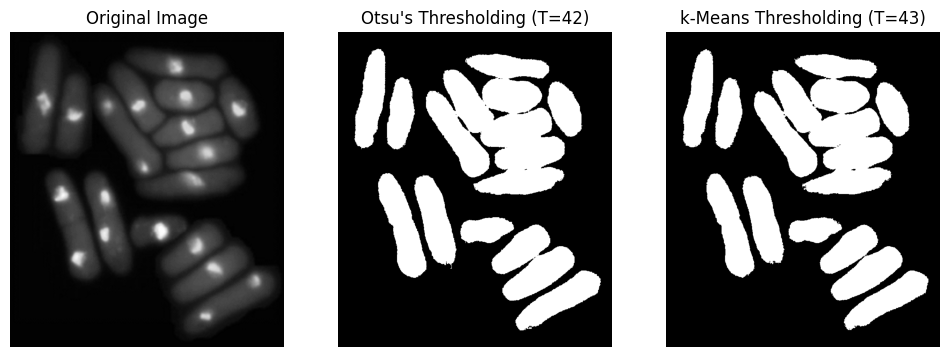

In [13]:
# Load the image and convert to grayscale
image_path = 'yeast.tif'  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Compute histogram
histogram = compute_histogram(image)

# Apply Otsu's thresholding
otsu_thresh, otsu_bc_variance, otsu_wc_variance = otsu_thresholding(histogram)
print(f"Otsu's Method: Threshold = {otsu_thresh}, Between-Class Variance = {otsu_bc_variance}, Within-Class Variance = {otsu_wc_variance}")

# Apply k-means thresholding
kmeans_thresh, mean1, mean2, kmeans_wc_variance, kmeans_bc_variance = kmeans_thresholding(histogram)
print(f"k-Means Method: Threshold = {kmeans_thresh}, Mean1 = {mean1}, Mean2 = {mean2}, Within-Class Variance = {kmeans_wc_variance}, Between-Class Variance = {kmeans_bc_variance}")

# Display the thresholded images
_, otsu_binary = cv2.threshold(image, otsu_thresh, 255, cv2.THRESH_BINARY)
_, kmeans_binary = cv2.threshold(image, kmeans_thresh, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(otsu_binary, cmap='gray')
plt.title(f"Otsu's Thresholding (T={otsu_thresh})")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(kmeans_binary, cmap='gray')
plt.title(f"k-Means Thresholding (T={kmeans_thresh})")
plt.axis('off')

plt.show()

Q4 Part B

In [26]:
# def kmeans_clustering_color_image(image, k=5, num_initializations=5):
#     # Reshape the image to a 2D array of pixels, each with 3 color components (RGB)
#     pixels = image.reshape(-1, 3)

#     best_labels = None
#     best_centers = None
#     best_between_class_variance = -np.inf  # initialize with a very low variance
#     all_variances = []
#     results = []

#     # Run K-means multiple times with random initializations
#     for i in range(num_initializations):
#         kmeans = KMeans(n_clusters=k, init='random', random_state=i)
#         kmeans.fit(pixels)
        
#         # Get the labels and cluster centers
#         labels = kmeans.labels_
#         centers = kmeans.cluster_centers_
        
#         # Calculate between-class variance
#         global_mean = np.mean(pixels, axis=0)
#         between_class_variance = sum(
#             (np.mean(pixels[labels == cluster], axis=0) - global_mean) ** 2
#             for cluster in range(k)
#         ).sum()
        
#         all_variances.append(between_class_variance)
#         results.append((labels, centers, between_class_variance))
        
#         # Update the best result if current variance is higher
#         if between_class_variance > best_between_class_variance:
#             best_between_class_variance = between_class_variance
#             best_labels = labels
#             best_centers = centers
    
#     # Reshape best result back to image dimensions
#     segmented_image = best_centers[best_labels].reshape(image.shape).astype(np.uint8)

#     # Plot the segmented image and display variance information
#     plt.imshow(segmented_image)
#     plt.title(f'Segmented Image with k={k}, Best Between-Class Variance={best_between_class_variance:.2f}')
#     plt.axis('off')
#     plt.show()

#     print("Between-Class Variances across runs:", all_variances)
#     print("Best Labels:", best_labels)
#     print("Best Center:", best_centers)
#     print("Best Between-Class Variance:", best_between_class_variance)
    
#     return segmented_image, all_variances


def kmeans_clustering_color_image(image, k=5, num_initializations=5):
    # Reshape the image to a 2D array of pixels, each with 3 color components (RGB)
    pixels = image.reshape(-1, 3)

    best_labels = None
    best_centers = None
    best_between_class_variance = -np.inf  # initialize with a very low variance
    all_variances = []
    results = []

    # Calculate global mean of the entire image for between-class variance calculation
    global_mean = np.mean(pixels, axis=0)

    # Run K-means multiple times with random initializations
    for i in range(num_initializations):
        kmeans = KMeans(n_clusters=k, init='random', random_state=i*100)
        kmeans.fit(pixels)
        
        # Get the labels and cluster centers
        labels = kmeans.labels_
        centers = kmeans.cluster_centers_
        
        # Calculate between-class variance using the provided formula
        # Calculate between-class variance
        between_class_variance = 0.0
        for cluster in range(k):
            cluster_pixels = pixels[labels == cluster]
            if len(cluster_pixels) == 0:
                continue
            cluster_mean = np.mean(cluster_pixels, axis=0)
            weight = len(cluster_pixels) / len(pixels)
            between_class_variance += weight * np.sum((cluster_mean - global_mean) ** 2)
        
        print("Between class variane:", between_class_variance)
        all_variances.append(between_class_variance)
        
        all_variances.append(between_class_variance)
        results.append((labels, centers, between_class_variance))
        
        # Update the best result if current variance is higher
        if between_class_variance > best_between_class_variance:
            best_between_class_variance = between_class_variance
            best_labels = labels
            best_centers = centers
        
        # Reshape current result back to image dimensions and display
        segmented_image = centers[labels].reshape(image.shape).astype(np.uint8)
        plt.figure()
        plt.imshow(segmented_image)
        plt.title(f'Initialization {i+1}, Between-Class Variance={between_class_variance:.2f}')
        plt.axis('off')
        plt.show()

    # # Display final best segmented image and variance information
    final_segmented_image = best_centers[best_labels].reshape(image.shape).astype(np.uint8)
    # plt.figure()
    # plt.imshow(final_segmented_image)
    # plt.title(f'Best Segmented Image with k={k}, Best Between-Class Variance={best_between_class_variance:.2f}')
    # plt.axis('off')
    # plt.show()

    # print("Between-Class Variances across runs:", all_variances)
    # print("Best Labels:", best_labels)
    # print("Best Centers:", best_centers)
    # print("Best Between-Class Variance:", best_between_class_variance)
    
    return final_segmented_image, all_variances



Between class variane: 14929.191135019551


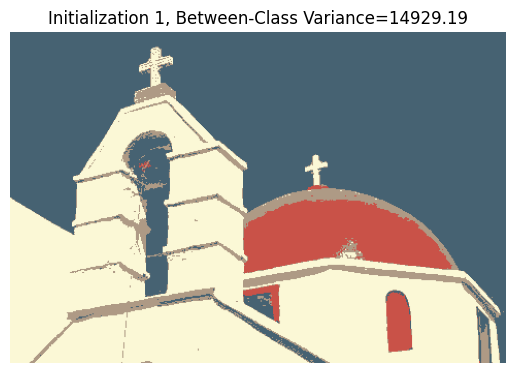

Between class variane: 14929.185681257863


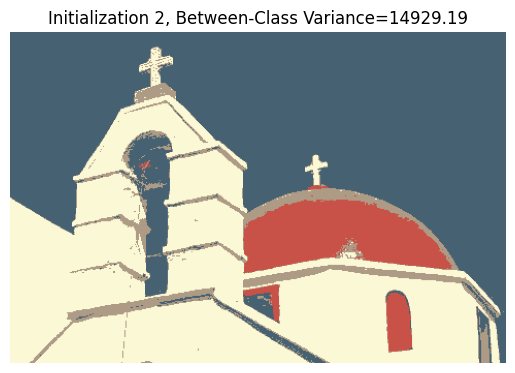

Between class variane: 14929.18472152986


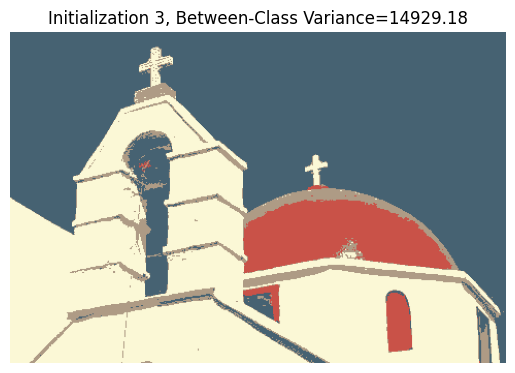

Between class variane: 14929.185072995664


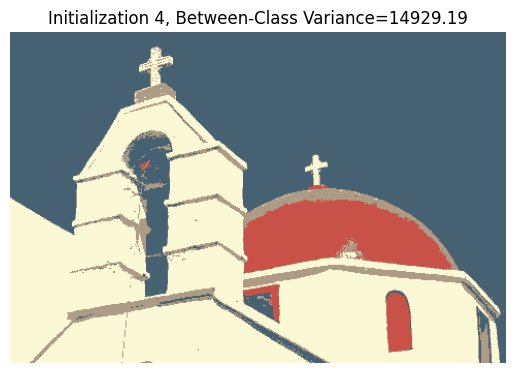

Between class variane: 14929.190328270532


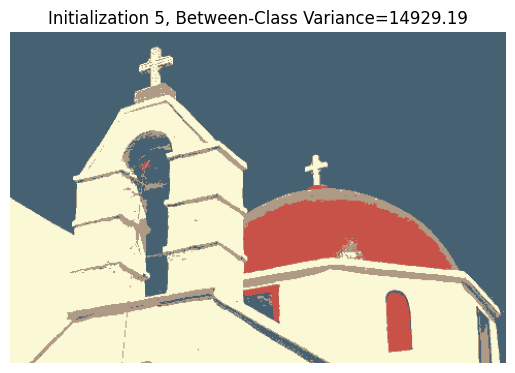

In [28]:
# Load the color image
image = cv2.imread('118035.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Set the number of clusters (k) and the number of random initializations
k = 4
num_initializations = 5

# Apply K-means clustering on the color image
segmented_image, variances = kmeans_clustering_color_image(image, k=k, num_initializations=num_initializations)

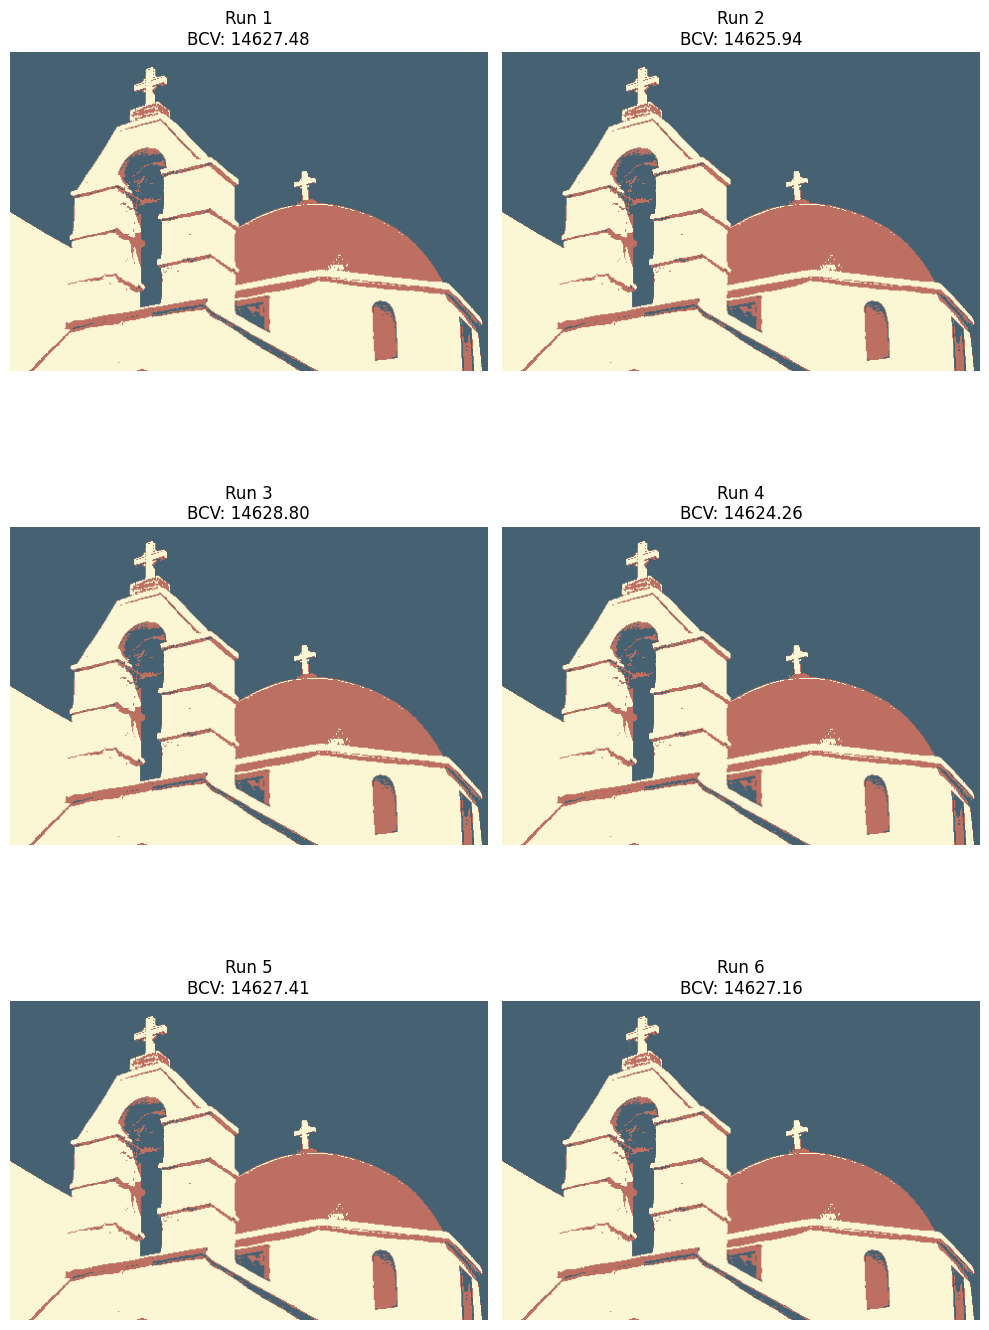

Between-Class Variances for each run:
Run 1: BCV = 14627.48
Run 2: BCV = 14625.94
Run 3: BCV = 14628.80
Run 4: BCV = 14624.26
Run 5: BCV = 14627.41
Run 6: BCV = 14627.16

Observation: Higher variability in BCVs and visual outputs may indicate sensitivity to initialization.


In [ ]:


pixels = image.reshape(-1, 3)  # Reshape to (num_pixels, 3)

# Define the number of clusters (k) and number of runs with different initializations
k = 3  # You can experiment with different values of k
n_runs = 6  # Number of times to run k-means with random initializations

# Store the results of each run
results = []
bcvs = []

# Function to calculate between-class variance (BCV)
def calculate_bcv(labels, centroids, overall_mean, N):
    bcv = 0
    for i in range(len(centroids)):
        cluster_size = np.sum(labels == i)
        centroid = centroids[i]
        bcv += (cluster_size / N)* np.linalg.norm(centroid - overall_mean) ** 2
    return bcv

# Run k-means clustering multiple times with different initializations
for run in range(n_runs):
    kmeans = KMeans(n_clusters=k, init='random', n_init=1, random_state=run)
    kmeans.fit(pixels)
    
    # Get cluster labels and centroids
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    
    # Reshape labels to match image shape and create clustered image
    clustered_image = centroids[labels].reshape(image.shape).astype(np.uint8)
    
    # Calculate the overall mean of the image
    overall_mean = np.mean(pixels, axis=0)
    
    # Calculate between-class variance for this run
    bcv = calculate_bcv(labels, centroids, overall_mean, len(pixels))
    
    # Store results
    results.append((clustered_image, bcv))
    bcvs.append(bcv)

import math
images_per_row = 2
n_rows = math.ceil(n_runs / images_per_row)

fig, axes = plt.subplots(n_rows, images_per_row, figsize=(10, 5 * n_rows))
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, (clustered_image, bcv) in enumerate(results):
    axes[i].imshow(clustered_image)
    axes[i].set_title(f'Run {i+1}\nBCV: {bcv:.2f}')
    axes[i].axis('off')

# Hide any unused subplots (if n_runs is not a multiple of images_per_row)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# Print comments on variability
print("Between-Class Variances for each run:")
for i, bcv in enumerate(bcvs):
    print(f"Run {i+1}: BCV = {bcv:.2f}")

print("\nObservation: Higher variability in BCVs and visual outputs may indicate sensitivity to initialization.")

Part C

In [38]:
from skimage import color
from skimage.segmentation import mark_boundaries

def slic_superpixels(image, s=15, num_iterations=10):
    # Convert image to Lab color space for better perceptual similarity
    lab_image = color.rgb2lab(image)
    h, w = lab_image.shape[:2]
    d_cm = s
    d_sm = s
    
    # Number of superpixels
    num_superpixels = (h // s) * (w // s)
    S = s  # grid spacing
    centers = []  # cluster centers in (x, y, L, a, b)
    label = -np.ones((h, w), dtype=int)  # label map
    distance = np.full((h, w), np.inf)  # distance map
    
    # Initialize cluster centers on a grid
    for y in range(S // 2, h, S):
        for x in range(S // 2, w, S):
            L, a, b = lab_image[y, x]
            centers.append([x, y, L, a, b])
    
    centers = np.array(centers)
    num_centers = centers.shape[0]
    
    # Iterate to refine clusters
    for iteration in range(num_iterations):
        for i, (cx, cy, cL, ca, cb) in enumerate(centers):
            x_min, x_max = max(cx - S, 0), min(cx + S, w)
            y_min, y_max = max(cy - S, 0), min(cy + S, h)
            
            # Consider pixels in the 2S x 2S region around the center
            for x in range(int(x_min), int(x_max)):
                for y in range(int(y_min), int(y_max)):
                    L, a, b = lab_image[y, x]
                    
                    # Calculate spatial distance and color distance
                    d_color = np.sqrt((L - cL)**2 + (a - ca)**2 + (b - cb)**2)
                    d_spatial = np.sqrt((x - cx)**2 + (y - cy)**2)
                    
                    # Combined distance
                    D = np.sqrt( (d_color/d_cm)**2 + (d_spatial/d_sm)**2)
                    
                    # Update if this cluster center is closer
                    if D < distance[y, x]:
                        distance[y, x] = D
                        label[y, x] = i
        
        # Update cluster centers based on mean of assigned pixels
        new_centers = np.zeros_like(centers)
        counts = np.zeros(num_centers, dtype=int)
        
        for y in range(h):
            for x in range(w):
                cluster_id = label[y, x]
                if cluster_id != -1:
                    new_centers[cluster_id, :2] += [x, y]
                    new_centers[cluster_id, 2:] += lab_image[y, x]
                    counts[cluster_id] += 1
        
        for i in range(num_centers):
            if counts[i] > 0:
                new_centers[i] /= counts[i]
        
        # Check for convergence
        if np.allclose(centers, new_centers, atol=1e-2):
            break
        
        centers = new_centers
    
    # Create two visualizations
    segmented_image = np.zeros_like(lab_image)
    for i in range(num_centers):
        mask = (label == i)
        segmented_image[mask] = centers[i, 2:]
    
    segmented_image_rgb = color.lab2rgb(segmented_image)
    
    # Highlight edges of superpixels
    edge_image = mark_boundaries(image, label, color=(1, 0, 0))

    # Plot results
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(segmented_image_rgb)
    ax[0].set_title("Segmented Image with Cluster Means")
    ax[0].axis("off")
    
    ax[1].imshow(edge_image)
    ax[1].set_title("Superpixel Edges")
    ax[1].axis("off")
    
    plt.show()
    
    return segmented_image_rgb, edge_image



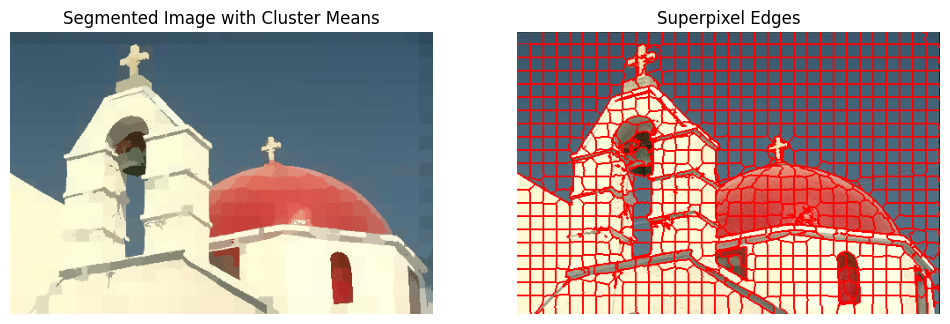

In [39]:
# Load the input image
image = cv2.imread('118035.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Run SLIC-based superpixel segmentation
s = 15  # grid spacing for superpixels
segmented_image, edge_image = slic_superpixels(image, s=s)
